In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_52_305.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_0_5445.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_33_237.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_5_8221.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_67_8050.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_56_4689.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_48_1583.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_12_2082.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_39_8004.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set/FU-nail-fungus/_19_7696.jpg
/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_se

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.applications import VGG16

In [27]:
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

In [28]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(8,activation='softmax'))

In [29]:
conv_base.trainable=False

In [30]:
# We specify image augmentation parameters as the arguments
# Train - test/validation split can be done with the argument - validation_split
datagen = ImageDataGenerator(rescale=1./255,
                            validation_split = 0.1,rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
# flow_from_directory gets label for an image from the sub-directory it is placed in
# Generate Train data
traingenerator = datagen.flow_from_directory(
        '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/train_set',
        target_size=(150, 150),
    color_mode = "rgb",
        batch_size=32,
        subset='training',
        class_mode='categorical')

# Generate Validation data
valgenerator = datagen.flow_from_directory(
        '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set',
        target_size=(150, 150),
    color_mode = "rgb",
        batch_size=32,
        subset='validation',
        class_mode='categorical')

Found 834 images belonging to 8 classes.
Found 21 images belonging to 8 classes.


In [31]:
model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [32]:
history = model.fit(traingenerator, validation_data=valgenerator, epochs=50)

Epoch 1/50
27/27 [==============================] - 9s 307ms/step - loss: 1.8129 - accuracy: 0.3873 - val_loss: 0.8455 - val_accuracy: 0.7619
Epoch 2/50
27/27 [==============================] - 6s 229ms/step - loss: 0.9871 - accuracy: 0.6547 - val_loss: 0.4255 - val_accuracy: 0.8095
Epoch 3/50
27/27 [==============================] - 6s 229ms/step - loss: 0.8149 - accuracy: 0.7182 - val_loss: 0.4686 - val_accuracy: 0.9048
Epoch 4/50
27/27 [==============================] - 7s 241ms/step - loss: 0.7343 - accuracy: 0.7470 - val_loss: 0.7391 - val_accuracy: 0.7619
Epoch 5/50
27/27 [==============================] - 7s 241ms/step - loss: 0.7544 - accuracy: 0.7350 - val_loss: 0.3256 - val_accuracy: 0.8571
Epoch 6/50
27/27 [==============================] - 7s 241ms/step - loss: 0.5909 - accuracy: 0.7926 - val_loss: 0.5168 - val_accuracy: 0.8571
Epoch 7/50
27/27 [==============================] - 6s 236ms/step - loss: 0.5116 - accuracy: 0.8237 - val_loss: 0.4513 - val_accuracy: 0.8571
Epoch 

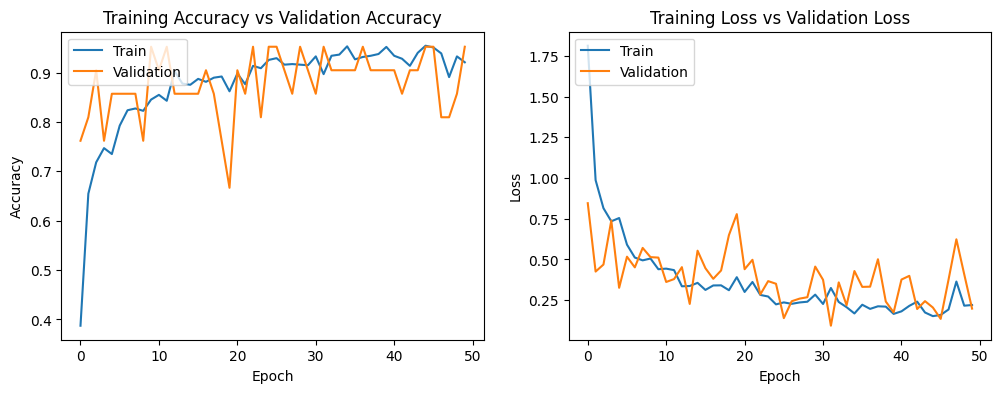

In [33]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [34]:
print("Accuracy of our model on validation data : " , model.evaluate(valgenerator)[1]*100 , "%")

1/1 [==============================] - 0s 337ms/step - loss: 0.4965 - accuracy: 0.8571
Accuracy of our model on validation data :  85.71428656578064 %


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 16,814,152
Trainable params: 2,099,464
Non-trainable params: 14,714,688
_________________________________________________________________


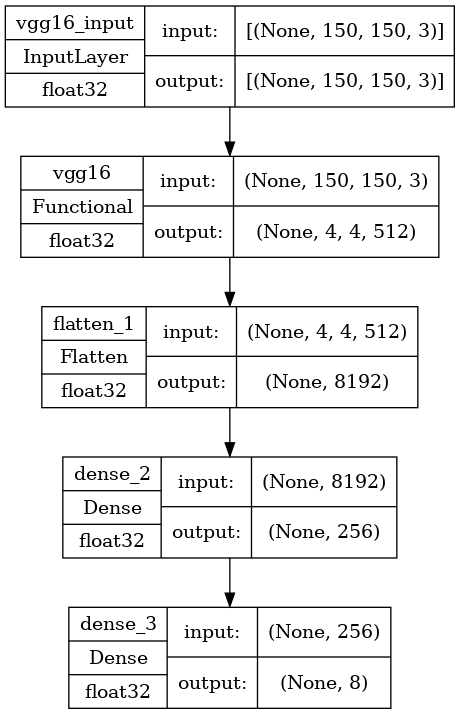

In [36]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [37]:
import numpy as np

def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

x_train, y_train = extract_data(traingenerator)
x_test, y_test = extract_data(valgenerator)

In [38]:
loss = model.evaluate(x_test,y_test) 
print("Test Acc: " + str(loss[1]))

1/1 [==============================] - 0s 110ms/step - loss: 0.1566 - accuracy: 0.9524
Test Acc: 0.9523809552192688


In [39]:
preds = model.predict(x_test)
y_pred = np.argmax(preds , axis = 1 )

1/1 [==============================] - 0s 151ms/step


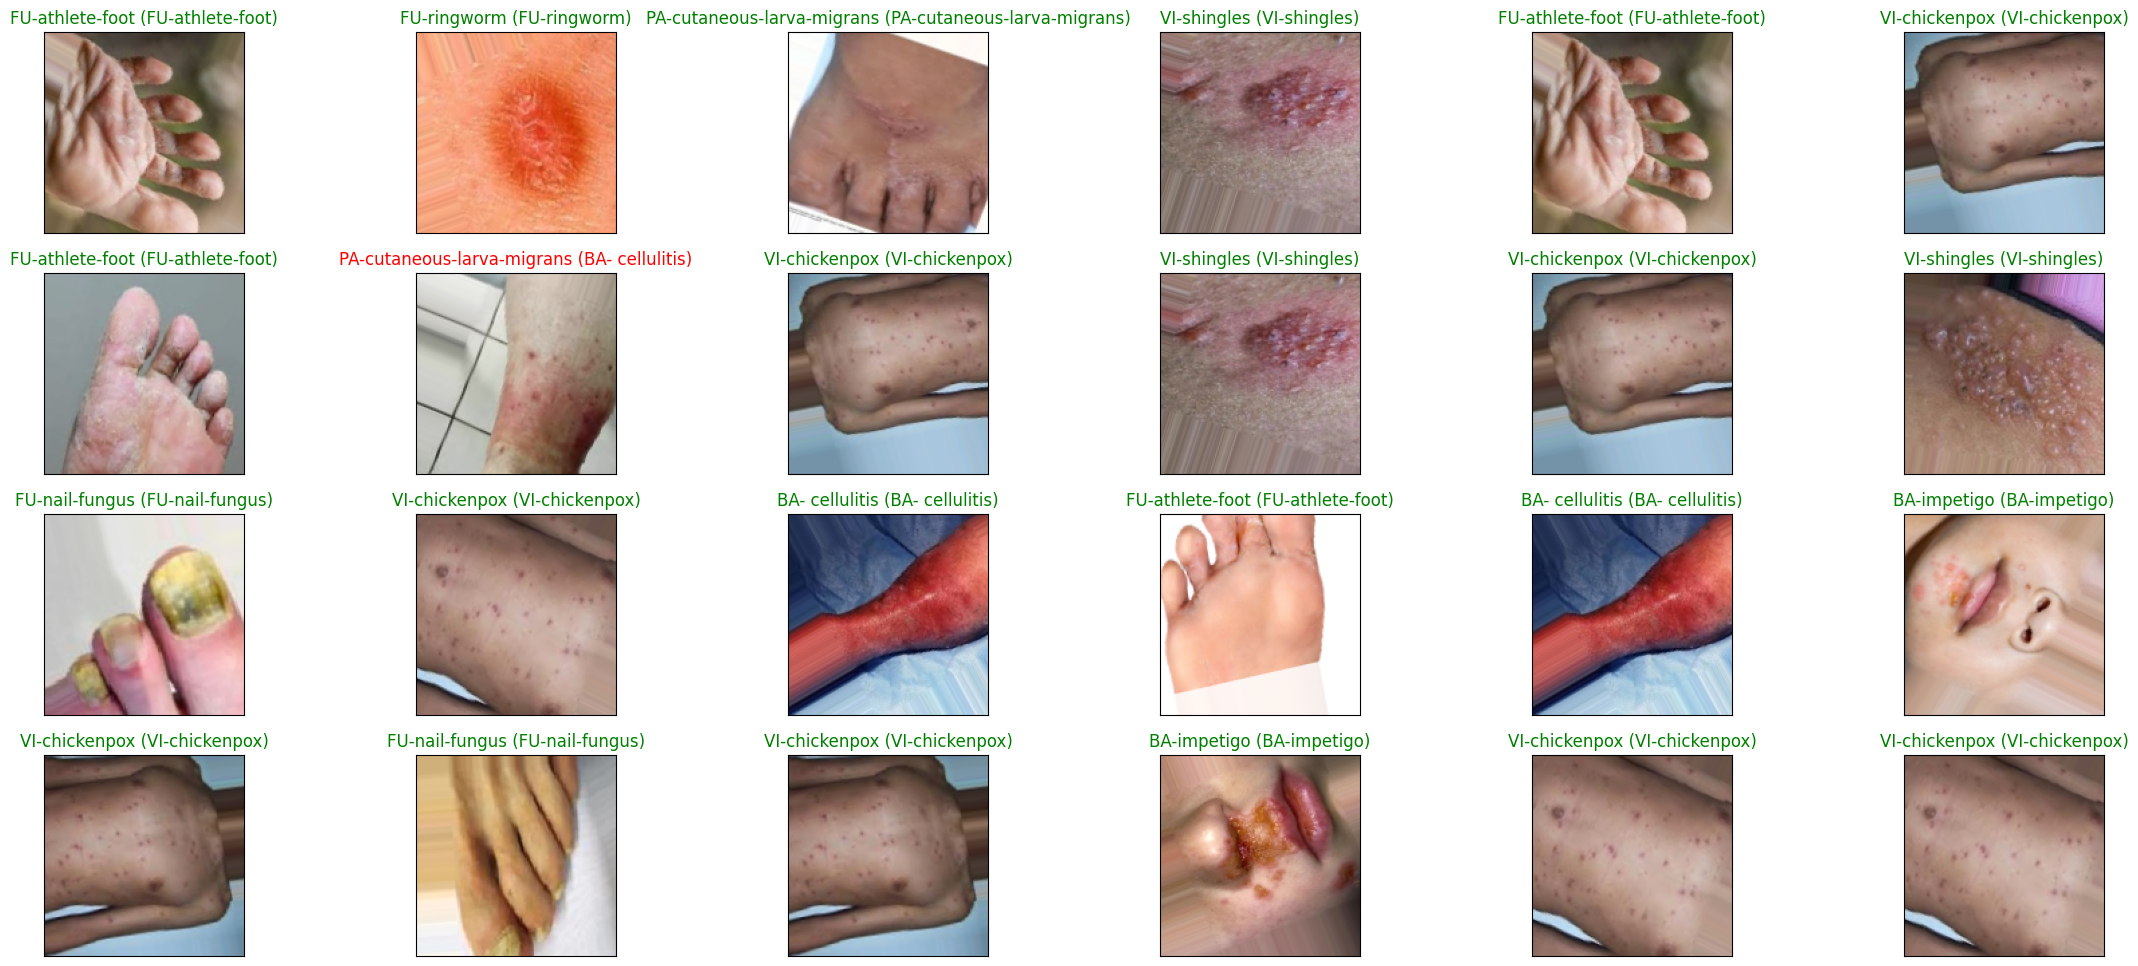

In [44]:
label_dict = {0 : 'BA- cellulitis', 1 : 'BA-impetigo', 2 : 'FU-athlete-foot', 3 : 'FU-nail-fungus', 4 : 'FU-ringworm', 5 : 'PA-cutaneous-larva-migrans', 6 : 'VI-chickenpox',7 : 'VI-shingles'}

figure = plt.figure(figsize=(28, 12))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

In [45]:
y_true = np.argmax(y_test, axis=1)


In [49]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.96      0.96      0.95        21
weighted avg       0.97      0.95      0.95        21

